# Pyedra's Tutorial

In this document we present a brief tutorial for the use of Pyedra. 

## Import pandas and pyedra

In [1]:
import pyedra

## Import data

Then we must import our dataset.

Pyedra has a loaded data set for you to "play around" and explore the different methods this api offers:

In [4]:
df = pyedra.datasets.load_carbognani2019()

## Fit your data

Fit your data using the phase function models that Pyedra offers.

Three different functions can be fitted in a very simple way.

### HG_fit

In [10]:
pyedra.HG_fit(df)

,id,H,error_H,G,error_G,R
0,85,7.492423,0.070257,0.043400,0.035114,0.991422
1,208,9.153433,0.217270,0.219822,0.097057,0.899388
2,236,8.059719,0.202373,0.104392,0.094382,0.914150
3,306,8.816185,0.122374,0.306459,0.048506,0.970628
4,313,8.860208,0.098102,0.170928,0.044624,0.982924
5,338,8.465495,0.087252,-0.121937,0.048183,0.992949
6,522,8.992164,0.063690,0.120200,0.028878,0.991757


All pandas dataframe options are available. For example, we can choose one of the columns:

In [18]:
HG = pyedra.HG_fit(df)

In [23]:
HG.H

0    7.492423
1    9.153433
2    8.059719
3    8.816185
4    8.860208
5    8.465495
6    8.992164
Name: H, dtype: float64

Or we can take the average of some of the columns:

In [24]:
HG.error_G.mean()

0.0566777891122176

### HG1G2_fit

In [6]:
pyedra.HG1G2_fit(df)

,id,H12,error_H12,G1,error_G1,G2,error_G2,R
0,85,7.398776,0.162316,0.303790,0.081963,0.236331,0.062360,0.996285
1,208,8.904819,0.326344,-0.393842,0.320769,0.709746,0.190495,0.976405
2,236,7.901036,0.558052,0.043248,0.361217,0.413350,0.237267,0.934118
3,306,8.224509,1.238547,-0.041959,0.529741,0.367042,0.443392,0.968671
4,313,8.883195,0.347260,0.661550,0.161242,0.127482,0.154199,0.984322
5,338,8.450968,0.391477,0.691141,0.194887,-0.070232,0.173648,0.991939
6,522,9.046202,0.213791,0.705920,0.107933,0.088499,0.087300,0.992124


### Shev_fit

In [8]:
pyedra.Shev_fit(df)

,id,V_lin,error_V_lin,b,error_b,c,error_c,R
0,85,7.957775,0.022576,0.696826,0.051010,0.034637,0.001184,0.999542
1,208,9.738767,0.146121,0.945126,0.300105,0.014448,0.008524,0.960483
2,236,8.626281,0.166623,0.916350,0.402758,0.023646,0.008515,0.932592
3,306,9.600553,0.275835,3.231009,1.549868,0.009097,0.010083,0.975662
4,313,9.132444,0.071010,0.297612,0.140332,0.037097,0.004712,0.988686
5,338,9.003280,0.216194,0.900765,0.623240,0.045328,0.011141,0.985846
6,522,9.292723,0.084461,0.392058,0.267625,0.039625,0.005236,0.989935


## Plot your data

Pyedra also allows you to plot your data against your chosen fit.

### HGPlot

In [18]:
HG = pyedra.HG_fit(df)

In [49]:
# QUIERO QUE PUEDA FILTRARSE EL DF

In [28]:
asteroid = HG[HG["id"] == 85]

TypeError: 'PyedraFitDataFrame' object is not subscriptable

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

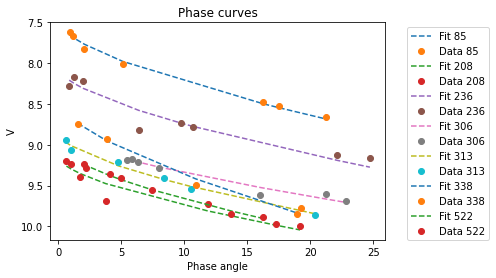

In [27]:
HG.plot(df = df)

In [48]:
# ACÁ QUIERO QUE ANDEN LOS KWARGS

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

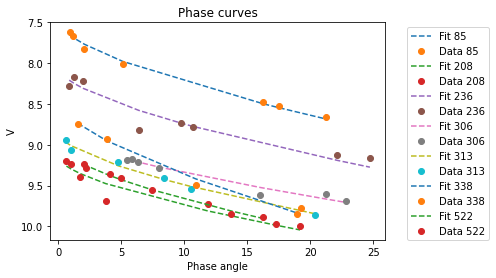

In [34]:
HG.plot(df = df, kind = 'curvefit',ax = None, marker = '<')

In [50]:
# ACA QUIERO QUE LOS PLOTS DE PANDAS ANDEN BIEN DE VERAS

Dataframe.plot() can also be used.

In [47]:
HG.plot(kind = 'hist', 'G')

SyntaxError: positional argument follows keyword argument (<ipython-input-47-48ea8ed8ac0f>, line 1)

### HG1G2Plot

In [52]:
HG1G2 = pyedra.HG1G2_fit(df)

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

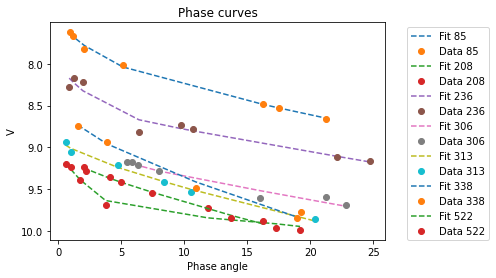

In [53]:
HG1G2.plot(df = df)

### ShevPlot

In [55]:
Shev = pyedra.Shev_fit(df)

<AxesSubplot:title={'center':'Phase curves'}, xlabel='Phase angle', ylabel='V'>

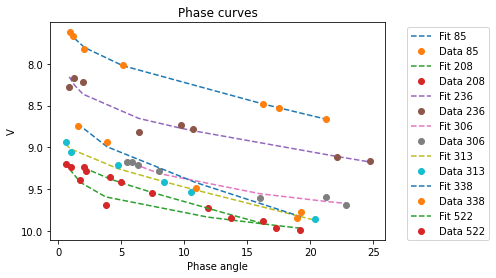

In [56]:
Shev.plot(df = df)